#### This notebook explores the ingested book and book review data to find trends that could be helpful when selecting attributes  in model construction.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

books_refined_file_path = './data/refined/filtered_books.csv'
book_reviews_refined_file_path = './data/refined/filtered_book_ratings.csv'

Text(0, 0.5, 'Number of Ratings')

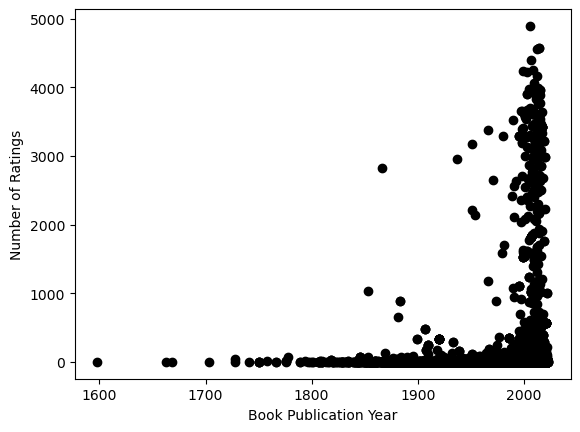

In [2]:
published_date_ratings_count = pd.read_csv(books_refined_file_path, usecols=["published_date", "ratings_count"])

published_date = published_date_ratings_count["published_date"].tolist()
ratings_count = published_date_ratings_count["ratings_count"].tolist()

plt.scatter(published_date, ratings_count, color='black')
plt.xlabel("Book Publication Year")
plt.ylabel("Number of Ratings")

Text(0, 0.5, 'Rating')

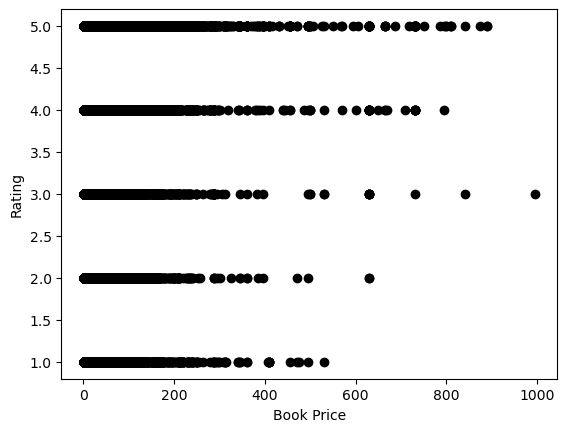

In [3]:
price_rating = pd.read_csv(book_reviews_refined_file_path, usecols=["price", "rating"])

price = price_rating["price"].tolist()
rating = price_rating["rating"].tolist()

plt.scatter(price, rating, color='black')
plt.xlabel("Book Price")
plt.ylabel("Rating")

Text(0, 0.5, 'Count')

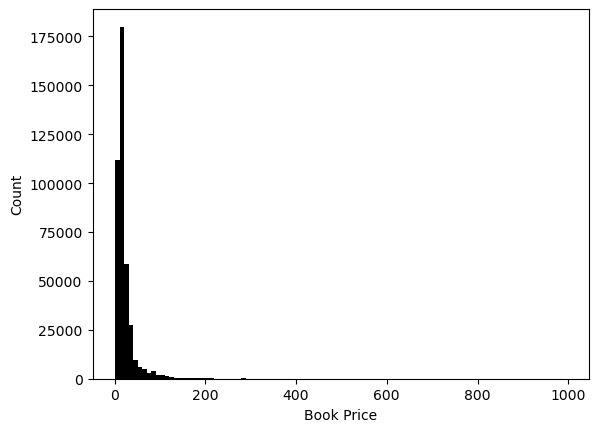

In [4]:
plt.hist(price, bins=100, color='black')
plt.xlabel('Book Price')
plt.ylabel('Count')

Text(0, 0.5, 'Average Ratings Count')

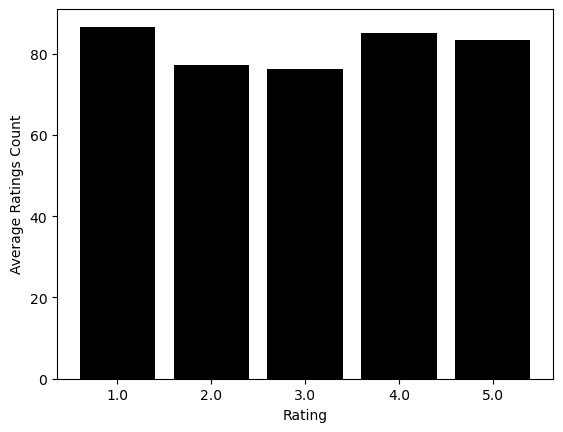

In [5]:
title_published_date_ratings_count = pd.read_csv(books_refined_file_path, usecols=["title", "published_date", "ratings_count"])
title_price_rating = pd.read_csv(book_reviews_refined_file_path, usecols=["title", "price", "rating"])

merged_book_attributes = title_published_date_ratings_count.merge(title_price_rating, on='title')

average_ratings_count_by_rating = merged_book_attributes[["ratings_count", "rating"]].groupby('rating').mean('ratings_count').reset_index()
average_ratings_count_by_rating["rating"] = average_ratings_count_by_rating["rating"].astype(str)

rating = average_ratings_count_by_rating["rating"].tolist()
ratings_count = average_ratings_count_by_rating["ratings_count"].tolist()

plt.bar(rating, ratings_count, color='black')
plt.xlabel('Rating')
plt.ylabel('Average Ratings Count')